In [2]:
from typing import *
import os
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tqdm.notebook import tqdm
from nptyping import NDArray, Shape, Int, Float
from rich import print as rprint

sns.set_style('whitegrid')
colors = ['#de3838', '#007bc3', '#ffd12a']
markers = ['o', 'x', ',']
%config InlineBackend.figure_formats = ['svg']

cmap = sns.diverging_palette(255, 0, as_cmap=True)  # カラーパレットの定義
DATA_DIR = Path()/'..'/'..'/'data'
DF_DIR = DATA_DIR/'dataframes'

In [11]:
# 21

df_uselog = pd.read_csv(DATA_DIR/'use_log.csv')
df_customer = pd.read_csv(DATA_DIR/'customer_master_ch3.csv')
df_class_master = pd.read_csv(DATA_DIR/'class_master.csv')
df_campaign_master = pd.read_csv(DATA_DIR/'campaign_master.csv')

display(df_uselog.head(2))
display(df_customer.head(2))
display(df_class_master)
display(df_campaign_master)

print(f'length of uselog: {len(df_uselog)}')
print(f'length of customer: {len(df_customer)}')
print(f'length of class_master: {len(df_class_master)}')
print(f'length of campaign_master: {len(df_campaign_master)}')

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


length of uselog: 197428
length of customer: 4192
length of class_master: 3
length of campaign_master: 3


In [15]:
# 22

df_customer = pd.read_csv(DATA_DIR/'customer_master_ch3.csv')
df_class_master = pd.read_csv(DATA_DIR/'class_master.csv')
df_campaign_master = pd.read_csv(DATA_DIR/'campaign_master.csv')

df_customer_join = pd.merge(df_customer, df_class_master, on='class', how='left')
df_customer_join = pd.merge(df_customer_join, df_campaign_master, on='campaign_id', how='left')

display(df_customer_join)
display(df_customer_join.isnull().sum())

df_customer_join.to_pickle(DF_DIR/'customer_join_k22.pkl')

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [25]:
# 23

df_customer_join = pd.read_pickle(DF_DIR/'customer_join_k22.pkl')


def display_df_by_customer_id(df, column):
    display(df.groupby(column).count()[['customer_id']])


display_df_by_customer_id(df_customer_join, 'class_name')
display_df_by_customer_id(df_customer_join, 'campaign_name')
display_df_by_customer_id(df_customer_join, 'gender')
display_df_by_customer_id(df_customer_join, 'is_deleted')

df_customer_join['start_date'] = pd.to_datetime(df_customer_join['start_date'])

df_customer_start = df_customer_join.loc[df_customer_join['start_date'] > pd.to_datetime('20180401')]
print(f'number of new users: {len(df_customer_start)}')

df_customer_join.to_pickle(DF_DIR/'customer_join_k23.pkl')

,customer_id
class_name,
オールタイム,2045
デイタイム,1019
ナイト,1128


,customer_id
campaign_name,
入会費半額,650
入会費無料,492
通常,3050


,customer_id
gender,
F,1983
M,2209


,customer_id
is_deleted,
0,2842
1,1350


number of new users: 1361


In [87]:
# 24

df_customer_join = pd.read_pickle(DF_DIR/'customer_join_k23.pkl')

def display_df_by_customer_id(df, column):
    display(df.groupby(column).count()[['customer_id']])


df_customer_join['end_date'] = pd.to_datetime(df_customer_join['end_date'])

# 直近一ヶ月以降のみの会員で絞る
withdrawal_after_latest_month = df_customer_join['end_date'] >= pd.to_datetime('20190331')
not_yet_withdrawn = df_customer_join['end_date'].isna()

df_customer_newer = df_customer_join.loc[withdrawal_after_latest_month | not_yet_withdrawn]

print(f'number of users in the latest month: {len(df_customer_newer)}')
print(f'unique end_date: {df_customer_newer["end_date"].unique()}')



display_df_by_customer_id(df_customer_newer, 'class_name')
display_df_by_customer_id(df_customer_newer, 'campaign_name')
display_df_by_customer_id(df_customer_newer, 'gender')

df_customer_join.to_pickle(DF_DIR/'customer_join_k24.pkl')

number of users in the latest month: 2953
unique end_date: [                          'NaT' '2019-03-31T00:00:00.000000000']


,customer_id
class_name,
オールタイム,1444
デイタイム,696
ナイト,813


,customer_id
campaign_name,
入会費半額,311
入会費無料,242
通常,2400


,customer_id
gender,
F,1400
M,1553


In [59]:
# 25

df_uselog: pd.DataFrame = pd.read_csv(DATA_DIR/'use_log.csv')

df_uselog['usedate'] = pd.to_datetime(df_uselog['usedate'])
df_uselog['年月'] = df_uselog['usedate'].dt.strftime('%Y%m')

df_uselog_months: pd.DataFrame = df_uselog.groupby(['年月', 'customer_id'], as_index=False).count()
df_uselog_months.rename(columns={'log_id': 'count'}, inplace=True)
del df_uselog_months['usedate']

display(df_uselog_months)

df_uselog_customer: pd.DataFrame = df_uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
df_uselog_customer = df_uselog_customer.reset_index(drop=False)
display(df_uselog_customer)

df_uselog.to_pickle(DF_DIR/'uselog_k25.pkl')
df_uselog_customer.to_pickle(DF_DIR/'uselog_customer_k25.pkl')

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [60]:
# 26

df_uselog: pd.DataFrame = pd.read_pickle(DF_DIR/'uselog_k25.pkl')

df_uselog['weekday'] = df_uselog['usedate'].dt.weekday  # weekday: 0->月, ..., 6->日
df_uselog_weekday: pd.DataFrame = df_uselog.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()[['customer_id', '年月', 'weekday', 'log_id']]
df_uselog_weekday.rename(columns={'log_id': 'count'}, inplace=True)
display(df_uselog_weekday)

# 各月ごとで同一の曜日に4回以上来ている場合、フラグを立てる
df_uselog_weekday = df_uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
df_uselog_weekday['routine_flag'] = 0
df_uselog_weekday['routine_flag'] = df_uselog_weekday['routine_flag'].where(df_uselog_weekday['count'] < 4, 1)
display(df_uselog_weekday)

df_uselog.to_pickle(DF_DIR/'uselog_k26.pkl')
df_uselog_weekday.to_pickle(DF_DIR/'uselog_weekday_k26.pkl')

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [88]:
# 27

df_customer_join: pd.DataFrame = pd.read_pickle(DF_DIR/'customer_join_k24.pkl')
df_uselog_customer: pd.DataFrame = pd.read_pickle(DF_DIR/'uselog_customer_k25.pkl')
df_uselog_weekday: pd.DataFrame = pd.read_pickle(DF_DIR/'uselog_weekday_k26.pkl')

df_customer_join = pd.merge(df_customer_join, df_uselog_customer, on='customer_id', how='left')
df_customer_join = pd.merge(df_customer_join, df_uselog_weekday[['customer_id', 'routine_flag']], on='customer_id', how='left')

display(df_customer_join)
display(df_customer_join.isnull().sum())

df_customer_join.to_pickle(DF_DIR/'customer_join_k27.pkl')

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flag        0
dtype: int64

In [92]:
# 28

from dateutil.relativedelta import relativedelta

df_customer_join: pd.DataFrame = pd.read_pickle(DF_DIR/'customer_join_k27.pkl')

df_customer_join['calc_date'] = df_customer_join['end_date']
df_customer_join['calc_date'] = df_customer_join['calc_date'].fillna(pd.to_datetime('20190430'))  # 退会していない会員の退会日を20190430で埋める


def calc_membership_period(row: pd.Series) -> int:
    start_date: datetime = row['start_date']
    end_date: datetime = row['calc_date']
    delta: relativedelta = relativedelta(end_date, start_date)
    return delta.years*12 + delta.months


df_customer_join['membership_period'] = df_customer_join.swifter.apply(calc_membership_period, axis=1)
display(df_customer_join)

df_customer_join.to_pickle(DF_DIR/'customer_join_k28.pkl')

Pandas Apply:   0%|          | 0/4192 [00:00<?, ?it/s]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1


,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


,customer_id
routine_flag,
0,779
1,3413


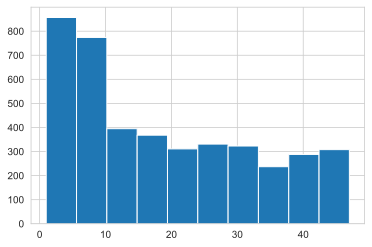

In [97]:
# 29

df_customer_join: pd.DataFrame = pd.read_pickle(DF_DIR/'customer_join_k28.pkl')

display(df_customer_join[['mean', 'median', 'max', 'min']].describe())

display(df_customer_join.groupby('routine_flag').count()[['customer_id']])

plt.hist(df_customer_join['membership_period'])
plt.show()

In [101]:
# 30

df_customer_join: pd.DataFrame = pd.read_pickle(DF_DIR/'customer_join_k28.pkl')

customer_end = df_customer_join.loc[df_customer_join['is_deleted'] == 1]
display(customer_end.describe())

customer_stay = df_customer_join.loc[df_customer_join['is_deleted'] == 0]
display(customer_stay.describe())

df_customer_join.to_pickle(DF_DIR/'customer_join_k30.pkl')

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
